### **Taller 7 -  Clasificadores**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez 

**1. clasificador no supervisado - Distancias Encadenadas (Single link)**

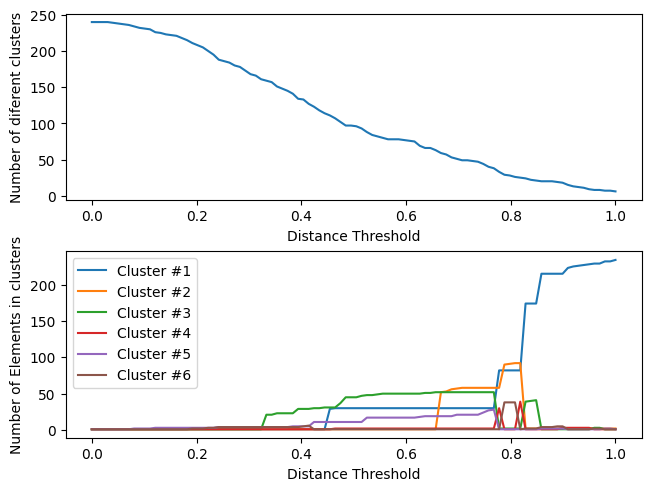

In [247]:
# Paso 1 - Carga de librerías y módulos necesarios
# Librerías
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

import matplotlib.pyplot as plt

# Módulos


# Paso 2 - Lectura de datos y comprobación
df = pd.read_csv('Project_Data_Fingers.csv')
df.describe().transpose()

# Paso 3 - Creación de arreglo de características y variable de respuesta
target_column = ['Clase']

predictors = list(set(list(df.columns))-set(target_column))  #Lista con todos los encabezados menos 'diabetes'
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

X = df[predictors].values
y = df[target_column].values

# 30% datos de prueba y 70% datos de entrenamiento
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)

clustering = AgglomerativeClustering(linkage='single', distance_threshold=0.7, n_clusters=None).fit(X_train)

Points=10000

Number_Diferent_Clusters=np.zeros(Points)
Number_Elements_n_Clusters=np.zeros((Points,6))
Element=0

for i in np.linspace(0,1,Points):
    clustering = AgglomerativeClustering(linkage='single', distance_threshold=i, n_clusters=None).fit(X_train)
    Cluster_Distribution=list(Counter(clustering.labels_).values())

    Number_Diferent_Clusters[Element]=len(Cluster_Distribution)

    if(len(Cluster_Distribution)<6):
        Number_Elements_n_Clusters[Element][:len(Cluster_Distribution)]=Cluster_Distribution
    else:
        Number_Elements_n_Clusters[Element][:]=Cluster_Distribution[:6]
    Element=Element+1


fig, (ax0, ax1) = plt.subplots(2, 1, layout='constrained')
ax0.plot(np.linspace(0,1,Points), Number_Diferent_Clusters)
ax0.set_ylabel('Number of diferent clusters')
ax0.set_xlabel('Distance Threshold')

ax1.plot(np.linspace(0,1,Points), Number_Elements_n_Clusters)
ax1.set_ylabel('Number of Elements in clusters')
ax1.set_xlabel('Distance Threshold')
ax1.legend(['Cluster #1', 'Cluster #2','Cluster #3', 'Cluster #4','Cluster #5', 'Cluster #6','Cluster #7', 'Cluster #8'])

plt.show()


**2. clasificador no supervisado - ISODATA**